In [1]:
from astropy.coordinates import (SkyCoord, BarycentricTrueEcliptic, GCRS, ICRS)
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import get_body_barycentric, get_body
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

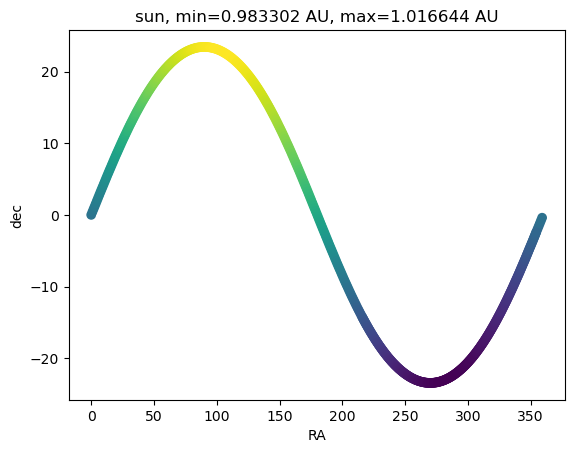

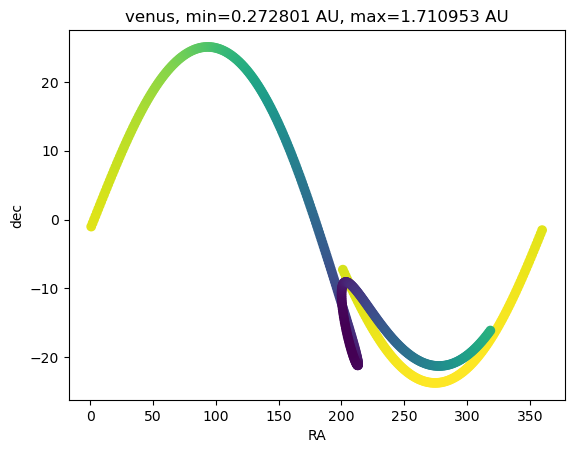

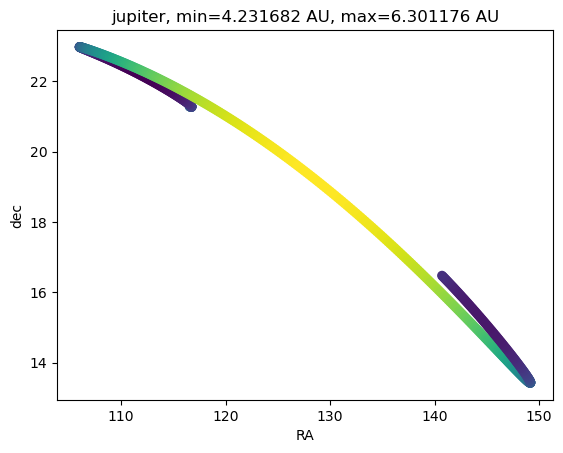

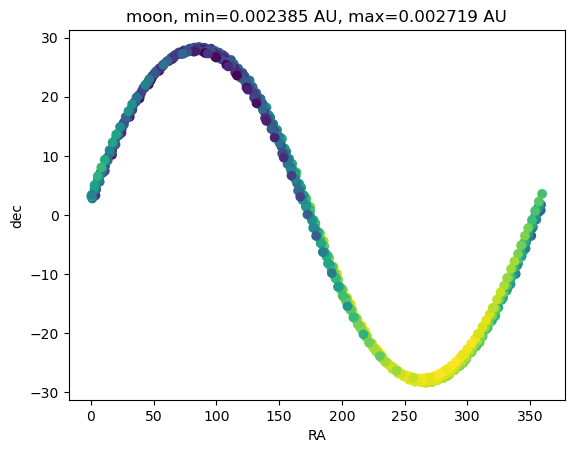

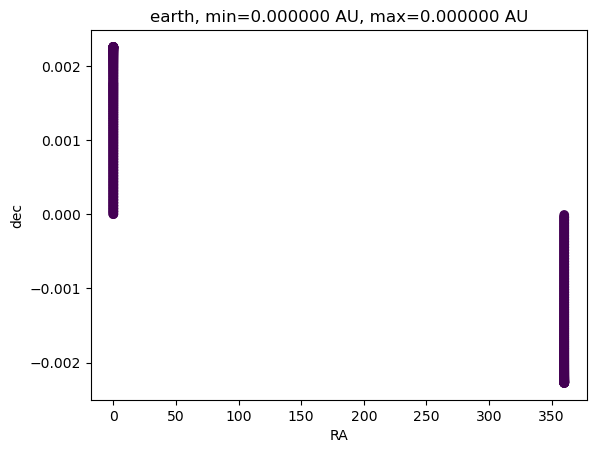

In [2]:
# set some times
mjd = np.arange(500) + 60980.0
times = Time(mjd, format="mjd")

for name in ["sun", "venus", "jupiter", "moon", "earth"]:
    body = get_body_barycentric(name, times)
    # convert to a SkyCoord
    body_sc = SkyCoord(body, representation_type='cartesian', obstime=times, frame=ICRS)
    body_gc = body_sc.transform_to(GCRS)
    fig, ax = plt.subplots()
    ax.scatter(body_gc.ra, body_gc.dec, c=body_gc.distance.au)
    ax.set_xlabel("RA")
    ax.set_ylabel("dec")
    ax.set_title("%s, min=%f AU, max=%f AU" % (name, body_gc.distance.au.min(), body_gc.distance.au.max()))

In [4]:
help(get_body)

Help on function get_body in module astropy.coordinates.solar_system:

get_body(body, time, location=None, ephemeris=None)
    Get a `~astropy.coordinates.SkyCoord` for a solar system body as observed
    from a location on Earth in the `~astropy.coordinates.GCRS` reference
    system.

    Parameters
    ----------
    body : str or list of tuple
        The solar system body for which to calculate positions.  Can also be a
        kernel specifier (list of 2-tuples) if the ``ephemeris`` is a JPL
        kernel.
    time : `~astropy.time.Time`
        Time of observation.
    location : `~astropy.coordinates.EarthLocation`, optional
        Location of observer on the Earth.  If not given, will be taken from
        ``time`` (if not present, a geocentric observer will be assumed).
    ephemeris : str, optional
        Ephemeris to use.  If not given, use the one set with
        ``astropy.coordinates.solar_system_ephemeris.set`` (which is
        set to 'builtin' by default).

    Ret